<a href="https://colab.research.google.com/github/Magguire/Magguire/blob/main/module_2_core_week_I_ip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FIFA RESULTS PREDICTION

## 1. Defining the Question

### a) Specifying the Question

<b>Overview</b> 

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)



Approach 1: Polynomial approach

What to train given:

1. Rank of home team

2. Rank of away team

3. Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [160]:
# Loading the Dataset
# fifa rankings = https://drive.google.com/file/d/1-UOI7HG2sArlb3IqIFu6ytLIDle1LnAp/view?usp=sharing
# results = https://drive.google.com/file/d/1FyTYM_vW6zywfMPeeC-FCs82jleURwBd/view?usp=sharing

import pandas as pd
import numpy as np
def read_data(url):
  file_id = url.split('/')[-2]
  dwn_url = 'https://drive.google.com/uc?id=' + file_id
  return pd.read_csv(dwn_url)

fifa = read_data(' https://drive.google.com/file/d/1-UOI7HG2sArlb3IqIFu6ytLIDle1LnAp/view?usp=sharing')
results = read_data('https://drive.google.com/file/d/1FyTYM_vW6zywfMPeeC-FCs82jleURwBd/view?usp=sharing')

## 3. Checking the Data

In [161]:
# Determining the no. of records in our dataset
#
fifa.shape, results.shape

((57793, 16), (40839, 9))

The fifa dataset contains 57793 and 16 columns while the results dataset contains 40839 records and 9 columns.

In [162]:
# Previewing the top of our dataset
#
fifa.head(10)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
5,6,Republic of Ireland,IRL,0.0,54,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
6,7,Russia,RUS,0.0,52,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
7,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
8,9,Norway,NOR,0.0,49,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
9,10,Denmark,DEN,0.0,51,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [163]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [164]:
# Previewing the bottom of our dataset
# 
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [165]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


The fifa dataset contains information on rankings and rank changes for teams since 1993 to 2018. For our analysis and prediction, we are going to use the results dataset which carries the focus of the research question. 

In [166]:
# Checking whether each column has an appropriate datatype
#
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [167]:
fifa.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [168]:
# convert date to datetime
from datetime import datetime
results['date'] = pd.to_datetime(results['date'],  format='%Y-%m-%d')
fifa['rank_date'] = pd.to_datetime(fifa['rank_date'], format='%Y-%m-%d')

In [169]:
# create a column for year
results['year'] = pd.DatetimeIndex(results['date']).year
results.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [105]:
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
year                   int64
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

The results dataset contains games played since 1872 to 2019. However fifa began in 21st May 1904. To retain validity of our data, we will drop the dates before then while cleaning out outliers.

## 5. Tidying the Dataset

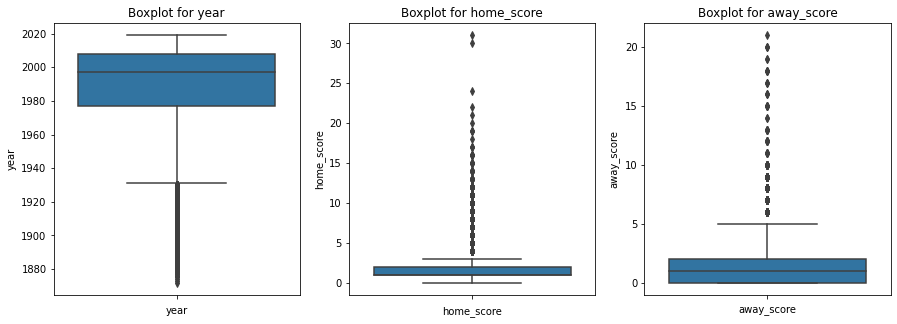

In [107]:
# Checking for Outliers
#
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['year', 'home_score', 'away_score']
fig, ax = plt.subplots(ncols=len(columns),figsize=(15,5))

for i, column in enumerate(columns):
    sns.boxplot(y = results[column], ax=ax[i])
    ax[i].set_title('Boxplot for {}'.format(column))
    ax[i].set_xlabel(column)

plt.show()

From the outliers visuals, we can see that most games were played between 1940 and 2020. There are outliers for score which dont seem to be outliers as there is no limit to number of scores per game.

In [108]:
# dropping years before 1904
results.drop(results[results['year'] < 1904].index, inplace=True)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
154,1904-02-29,Wales,England,2,2,British Championship,Wrexham,Wales,False,1904
155,1904-03-12,Northern Ireland,England,1,3,British Championship,Belfast,Republic of Ireland,False,1904
156,1904-03-12,Scotland,Wales,1,1,British Championship,Dundee,Scotland,False,1904
157,1904-03-21,Wales,Northern Ireland,0,1,British Championship,Bangor,Wales,False,1904
158,1904-03-26,Northern Ireland,Scotland,1,1,British Championship,Dublin,Republic of Ireland,False,1904


In [109]:
# reset index
results = results.reset_index()
results.head()

,index,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,154,1904-02-29,Wales,England,2,2,British Championship,Wrexham,Wales,False,1904
1,155,1904-03-12,Northern Ireland,England,1,3,British Championship,Belfast,Republic of Ireland,False,1904
2,156,1904-03-12,Scotland,Wales,1,1,British Championship,Dundee,Scotland,False,1904
3,157,1904-03-21,Wales,Northern Ireland,0,1,British Championship,Bangor,Wales,False,1904
4,158,1904-03-26,Northern Ireland,Scotland,1,1,British Championship,Dublin,Republic of Ireland,False,1904


In [110]:
# drop index column
results.drop('index', axis=1, inplace=True)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1904-02-29,Wales,England,2,2,British Championship,Wrexham,Wales,False,1904
1,1904-03-12,Northern Ireland,England,1,3,British Championship,Belfast,Republic of Ireland,False,1904
2,1904-03-12,Scotland,Wales,1,1,British Championship,Dundee,Scotland,False,1904
3,1904-03-21,Wales,Northern Ireland,0,1,British Championship,Bangor,Wales,False,1904
4,1904-03-26,Northern Ireland,Scotland,1,1,British Championship,Dublin,Republic of Ireland,False,1904


In [111]:
# Checking for Anomalies
#
# check interquatile range
def interquatile_range(column):
  q1 = results[column].quantile(.25)
  q3 = results[column].quantile(.75)
  intqr = q3 - q1
  return print({column: [q1,q3,intqr]})

for column in columns:
  interquatile_range(column)

{'year': [1977.0, 2008.0, 31.0]}
{'home_score': [1.0, 2.0, 1.0]}
{'away_score': [0.0, 2.0, 2.0]}


In [112]:
# Identifying the Missing Data
#
results.isnull().sum()

# There are no missing values in our dataset.

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
year          0
dtype: int64

In [113]:
# More data cleaning procedures
#
# check for duplicates
results.duplicated().sum()

# There are no duplicated values

0

In [114]:
# check uniformity in columns
results.columns

# columns are uniform

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year'],
      dtype='object')

## 6. Exploratory Analysis

In [115]:
# Ploting the univariate summaries and recording our observations
#
results.describe(include='all', datetime_is_numeric=True)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
count,40685,40685,40685,40685.000000,40685.000000,40685,40685,40685,40685,40685.000000
unique,NaN,309,306,NaN,NaN,109,1955,266,2,NaN
top,NaN,Brazil,Uruguay,NaN,NaN,Friendly,Kuala Lumpur,United States,False,NaN
freq,NaN,563,535,NaN,NaN,16874,581,1142,30527,NaN
mean,1990-11-04 01:51:03.959690240,NaN,NaN,1.741379,1.184589,NaN,NaN,NaN,NaN,1990.323780
min,1904-02-29 00:00:00,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1904.000000
25%,1977-11-10 00:00:00,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,1977.000000
50%,1997-06-03 00:00:00,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,1997.000000
75%,2008-09-19 00:00:00,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,2008.000000
max,2019-07-20 00:00:00,NaN,NaN,31.000000,21.000000,NaN,NaN,NaN,NaN,2019.000000


The dates range from 1904 to 2019.

There are 309 unique home teans and 306 unique away teams.

There are 266 countries and 1955 cities where the tournaments were held.

There are 109 unique tournaments.

In [62]:
# barplot function for value counts
def barplot(column):
  results[column].value_counts().plot.bar(figsize=(35,4))
  #sns.barplot(y = results[column].value_counts())
  plt.title('Barplot for {}'.format(column))
  plt.xlabel(column)
  plt.ylabel('Count')
  return plt.show()

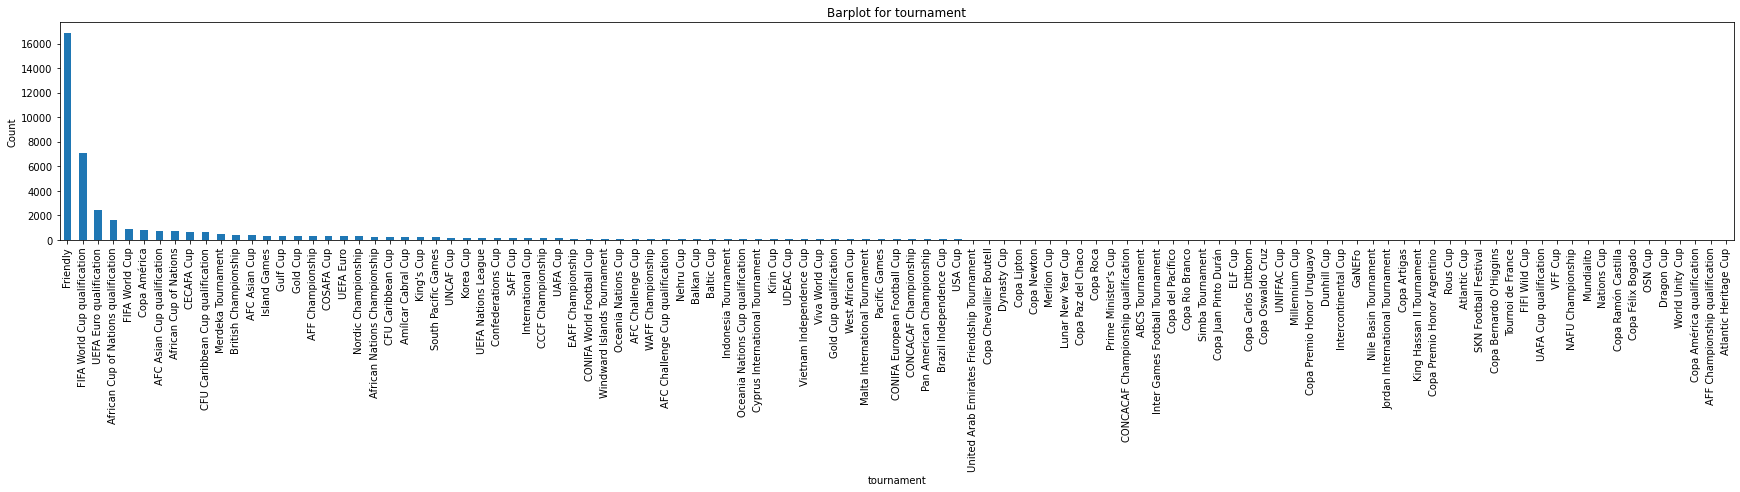

In [59]:
# tournament representation
barplot('tournament')

Most played matches are friendly matches.

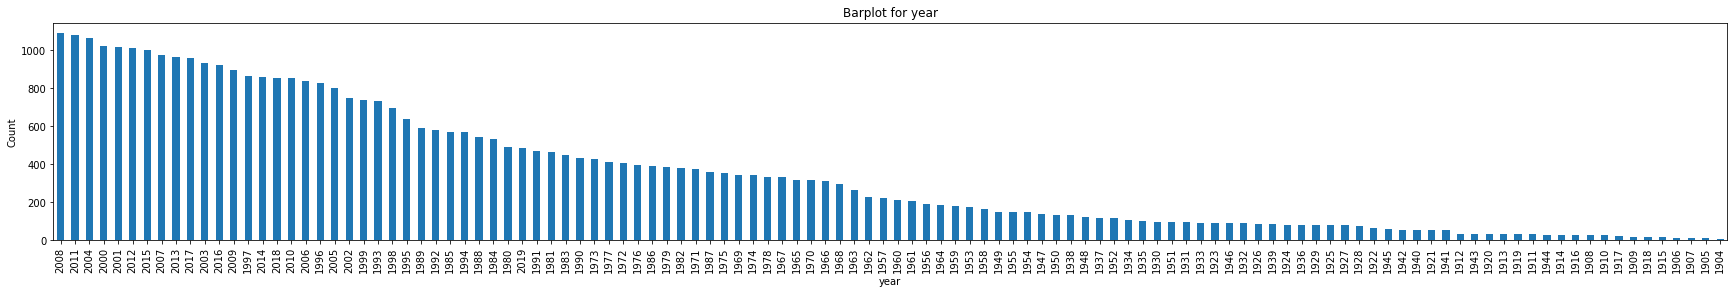

In [60]:
# year representation
barplot('year')

Most games in the dataset were played in 2008

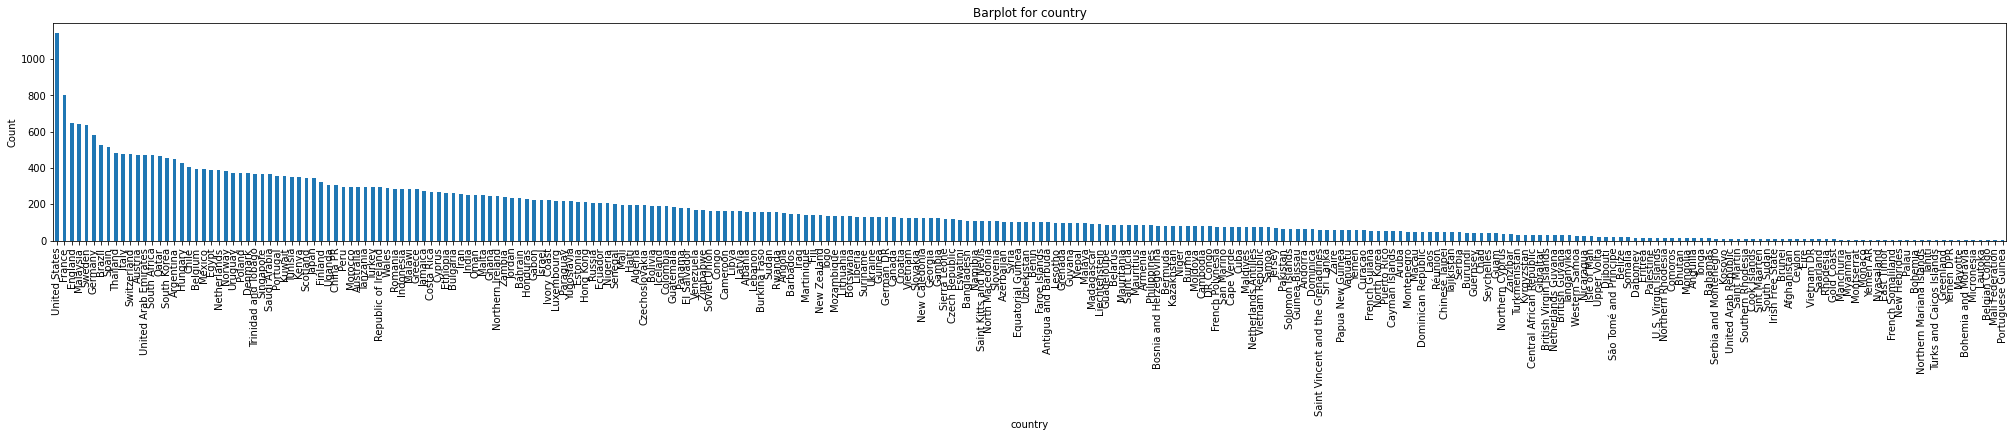

In [63]:
# country representation
barplot('country')

Most games were played in the United States.

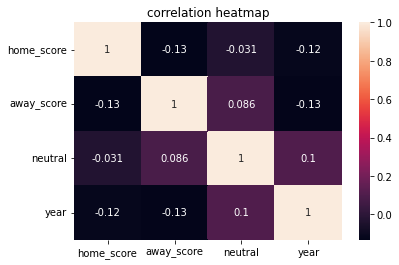

In [68]:
# Bivariate analysis

# check correlation
sns.heatmap(results.corr(), annot=True)
plt.title('correlation heatmap')
plt.show()

The variables are weakly correlated hence fully independent.

## 7. Implementing the Solution

Our dataset doesnot contain the target variable. This is however calculated from the score table. We are going to create our target variable as points with respect to the home team as follows: 

win - 3 points

draw - 2 points

lose - 1 point

### Formula for ranking points:

<b>Points = Previous points + I * (W - We)</b>

I: Importance of the match:

<i>I= 05 Friendly matches played outside of International Match Calendar windows

I= 10 Friendly matches played during International Match Calendar windows

I= 15 Group phase matches of Nations League competitions

I= 25 Play-off and final matches of Nations League competitions

I= 25 Qualification matches for Confederations final competitions and for FIFA World Cup final competitions

I= 35 Confederation final competition matches up until the QF stage

I= 40 Confederation final competition matches from the QF stage onwards; all FIFA Confederations Cup matches

I= 50 FIFA World Cup final competition matches up until QF stage

I= 60 FIFA World Cup final competition matches from QF stage onwards</i> 

W is either: win = 1, draw = 0.5, lose = 0

We = 1/ (10exp(-(teamA previous points - teamB previous points)/600) + 1)


In [170]:
# Implementing the Solution
# 
# we shall compare the home and away score and award points with respect to the home score

# create a value pair for home_score and away score
home_score = results['home_score'].tolist()
away_score = results['away_score'].tolist()
scores = list(zip(home_score,away_score))

# create an empty list to append points
points = []

# compare each value pair to award scores
for score in scores:
    if score[0] > score[1]:
       point = 1
    elif  score[0] == score[1]:  
       point = 0.5
    else:
       point = 0
    points.append(point)
print(points)    

# convert points into a dataframe 
points = pd.DataFrame(points)

# rename column to points
points.columns = ['points']
points.head()


[0.5, 1, 1, 0.5, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0.5, 0, 1, 0, 1, 0, 1, 1, 0.5, 1, 0.5, 0, 0, 0, 1, 0, 0, 0.5, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0.5, 0, 1, 0, 0, 1, 0, 0.5, 1, 1, 1, 0, 1, 0.5, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0.5, 0, 1, 0, 0.5, 1, 0.5, 0.5, 0.5, 1, 1, 1, 0, 0, 1, 0.5, 1, 1, 1, 0.5, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0.5, 1, 1, 0.5, 1, 1, 0, 0.5, 0, 0, 0.5, 1, 0, 0.5, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0.5, 0, 0.5, 0, 0.5, 0, 0.5, 1, 1, 0.5, 1, 1, 1, 1, 0.5, 0.5, 0, 1, 1, 0.5, 0, 0, 0, 0, 0.5, 0.5, 1, 0, 1, 0, 0, 0.5, 1, 1, 1, 0, 1, 1, 0.5, 0.5, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0.5, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0.5, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0.5, 1, 0, 1, 0, 0.5, 0, 0, 1, 0.5, 1, 0.5, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0.5, 0, 0, 0, 1, 0, 1, 0.5, 1, 1, 0, 1, 0.5, 1, 0.5, 1, 1, 1, 1, 0.5, 1, 0, 0, 1, 0, 0.5, 0, 1, 0, 0, 1, 0, 1

,points
0,0.5
1,1.0
2,1.0
3,0.5
4,1.0


In [171]:
# concatenate points with original results dataframe
df1 = pd.concat([results, points], axis=1)
df1.head() 

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,points
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,0.5
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,1.0
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,1.0
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,0.5
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,1.0


In [177]:
# since our prediction relies on rankings, we will focus only on games that were ranked 
df = df1.merge(fifa, how='inner', left_on=['home_team', 'date'], right_on=['country_full', 'rank_date'])
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,...,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [173]:
df.shape

(957, 27)

In [178]:
len(df['home_team'].unique())

165

In [184]:
df['rank'].sort_values().unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 159, 160, 161,
       162, 163, 164, 165, 166, 168, 169, 171, 172, 173, 174, 175, 176,
       177, 179, 180, 181, 183, 184, 188, 191, 193, 195, 197, 19

Since our dataset contains numerous records

We also require the rank of each team since 1904. The fifa dataset can provide this information. We will require three columns from this dataset. That is: rank, rank_change and date.

In [ ]:
# rank, rank_change and date

ranking = fifa['rank','']

## Polynomial Approach

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?